# HW 8

### Deadline: 07.01.25, 23:59 Uhr

In [20]:
# import modules

from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import os

import random

In [21]:
# load MNIST data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


In [22]:
# exploration

print(x_train.shape)
print(y_train.shape)

no_samples = x_train.shape[0]

(60000, 28, 28)
(60000,)


In [23]:
# create folder to save plots

path = '.\HW8_plots'
if not os.path.exists(path):
    os.makedirs(path)

<>:3: SyntaxWarning: invalid escape sequence '\H'
<>:3: SyntaxWarning: invalid escape sequence '\H'
C:\Users\josep\AppData\Local\Temp\ipykernel_28644\2219474524.py:3: SyntaxWarning: invalid escape sequence '\H'
  path = '.\HW8_plots'


## Task 1

- plot random sample
  - display label in title
  - set suitable colormap
- name five examples of activation functions

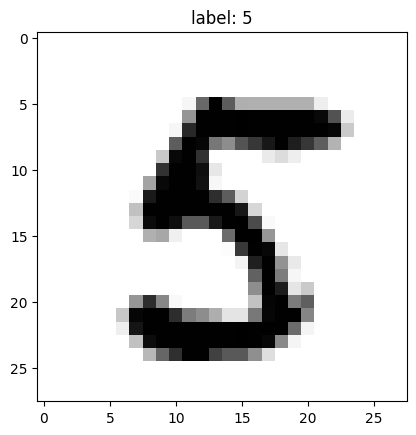

In [24]:
# plot random sample
np.random.seed(23464631)

idx = np.random.choice(no_samples)
image = x_train[idx]
label = y_train[idx]

plt.imshow(image, cmap='binary')
plt.title(f'label: {label}')
plt.savefig('./HW8_plots/random_MNIST_sample.png')

## Task 2

- build CNN using `tf.keras.Sequential()` (display it using `model.summary()`)

In [27]:
import tensorflow as tf
from keras.layers import Conv2D, ReLU, MaxPooling2D, Flatten, Dense, Dropout, Softmax
from keras import models


def build_CNN():
    model = tf.keras.Sequential()   # define model

    # stage 1: Conv3x3 + ReLU + MaxPooling
    model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=(28, 28, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))    # reduce dim from 28x28 to 14x14

    # stage 2: Conv3x3 + ReLU + MaxPooling
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))    # reduce dim from 14x14 to 7x7

    # stage 3: Conv3x3 + ReLU
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))

    # stage 4: Flatten
    model.add(Flatten())

    # stage 5: Dense + ReLU + Dropout(0.2)
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(rate=0.2))

    # stage 6: Dense + Softmax
    model.add(Dense(units=10, activation='softmax'))

    return model

my_CNN = build_CNN()
my_CNN.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 7, 7, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,010 (812.54 KB)

 Trainable params: 208,010 (812.54 KB)

 Non-trainable params: 0 (0.00 B)

## Task 3

- compile model using `"adam", "sparce_categorical_crossentropy", metrics=['acc']`
- answer questions
  - What is *adam*?
  - What does *sparse_categorical_crossentropy* mean?
- Train model for 10 epochs.
  - What does *epoch* mean?

In [70]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% validation set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(38400, 28, 28)
(9600, 28, 28)
(38400,)
(9600,)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# configure model for training
step_size = 0.00001     # default for Adam is 0.001, lead to bad convergence
my_CNN.compile(optimizer=Adam(learning_rate=step_size), loss='sparse_categorical_crossentropy', metrics=['acc'])

# train model for 10 epochs
no_epochs = 10
CNN_history = my_CNN.fit(x=x_train, y=y_train, epochs=no_epochs, validation_data=(x_val,y_val))

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.9989 - loss: 0.0045 - val_acc: 0.9950 - val_loss: 0.0860
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.9989 - loss: 0.0075 - val_acc: 0.9952 - val_loss: 0.0838
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.9990 - loss: 0.0077 - val_acc: 0.9952 - val_loss: 0.0822
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.9991 - loss: 0.0048 - val_acc: 0.9952 - val_loss: 0.0825
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.9987 - loss: 0.0083 - val_acc: 0.9952 - val_loss: 0.0806
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.9988 - loss: 0.0065 - val_acc: 0.9953 - val_loss: 0.0797
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.9990 - loss: 0.0056 - val_acc: 0.9953 - val_loss: 0.0789
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.9986 - loss: 0.0092 - val_acc: 0.9955 - val_loss: 0.0786
Epoch 9/10
1200/1200 ━━━━━━━━━━━━━━━━━━━

In [115]:
CNN_history.model
CNN_history.params
CNN_history.history.keys()
# CNN_history.history

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

In [121]:
# evaluate the model on test set
test_loss, test_accuracy = my_CNN.evaluate(x_test, y_test, verbose=2)


print(f"Test Accuracy: {test_accuracy*100:.2f}%")

313/313 - 1s - 3ms/step - acc: 0.9905 - loss: 0.2906
Test Accuracy: 99.05%


## Task 4

- evaluate performance of CNN
  - plot training loss over the epochs
  - screenshot with test accuracy of my CNN

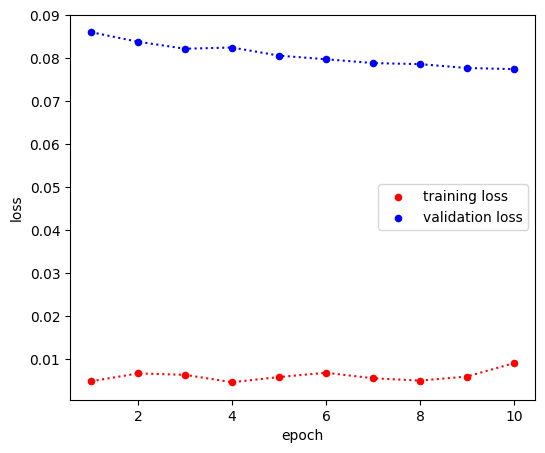

In [120]:
# Plot training loss over epochs
plt.figure(figsize=(6, 5))    #figsize=(4, 3)

epochs = range(1, no_epochs+1)
plt.plot(epochs, CNN_history.history["loss"], color='r', linestyle='dotted', linewidth=1.5, markersize=10)
plt.scatter(epochs, CNN_history.history["loss"], color='r', s=20, label="training loss")  # s sets the size of the dots
plt.plot(epochs, CNN_history.history['val_loss'], color='b', linestyle='dotted', linewidth=1.5, markersize=10)
plt.scatter(epochs, CNN_history.history["val_loss"], color='b', s=20, label="validation loss")  # s sets the size of the dotsplt.xticks(epochs)  # Ensure all epochs are labeled on the x-axis
plt.legend()
plt.xlabel("epoch")
plt.ylabel('loss')

plt.savefig(f'./HW8_plots/losses_step_size_{step_size}.png')

plt.show()

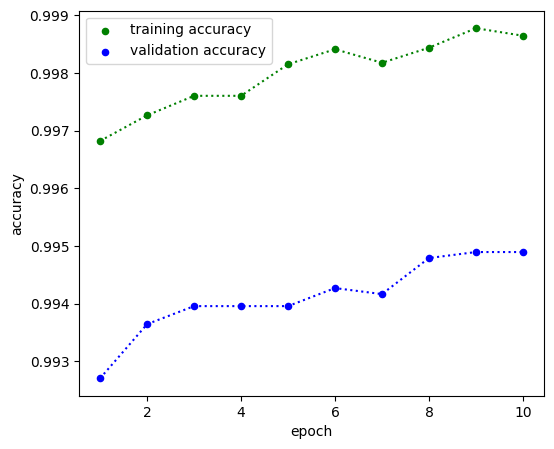

In [117]:
# Plot accuracy over epochs
plt.figure(figsize=(6, 5))    #figsize=(4, 3)

epochs = range(1, no_epochs+1)
plt.plot(epochs, CNN_history.history["acc"], color='g', linestyle='dotted', linewidth=1.5, markersize=10)
plt.scatter(epochs, CNN_history.history["acc"], color='g', s=20, label="training accuracy")  # s sets the size of the dots
plt.plot(epochs, CNN_history.history['val_acc'], color='b', linestyle='dotted', linewidth=1.5, markersize=10)
plt.scatter(epochs, CNN_history.history["val_acc"], color='b', s=20, label="validation accuracy")  # s sets the size of the dotsplt.xticks(epochs)  # Ensure all epochs are labeled on the x-axis
plt.legend()
plt.xlabel("epoch")
plt.ylabel('accuracy')
plt.show()